# Projeto Prático 1

## Redes Neurais - 2020

#### Elaborado por: Carlos Diego Ferreira, João Victor de Oliveira e Luiz Carlos Silva

## Análise exploratória e Visualização de Dados

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats

### Uma breve contextualização do dataset

## Abrir dataset em formato csv usando pandas

In [2]:
df = pd.read_csv('Manaus.csv', sep = ';', encoding='latin-1') 
#Foi feita uma conversão das colunas com datas de strings para o objetos timestamps.
df.head()

C:\Users\luido\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (12,15,22,24,30,31,32,33,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,_idade,_faixa etária,_sexo,_bairro,_classificacao,_comorb_renal,_comorb_diabetes,_comorb_imuno,_comorb_cardio,_conclusao,...,_distrito,_bairro_mapa,_comorb_respiratoria,_comorb_cromossomica,_comorb_hepatica,_comorb_neurologica,_comorb_hemato,_comorb_obessidade,_origem,_evolução
0,37.0,30a - 39a,F,CONJ. CIDADAO 10,Confirmado,Não,Não,Não,Não,NaN,...,OESTE,TARUMÃ,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
1,46.0,40a - 49a,F,MORADA DO SOL,Descartado,Não,Não,Não,Não,Recuperado,...,SUL,ALEIXO,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
2,51.0,50a - 59a,F,NaN,Confirmado,Não,Não,Não,Não,NaN,...,NaN,NaN,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
3,74.0,70a - 79a,M,NaN,Confirmado,Não,Não,Não,Não,NaN,...,NaN,NaN,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
4,51.0,50a - 59a,F,ALEIXO,Confirmado,Não,Não,Não,Não,NaN,...,SUL,ALEIXO,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN


## De acordo com o indicado na descrição do projeto, serão mantidos apenas os casos confirmados

In [3]:
df = df[df['_classificacao'] == 'Confirmado'].reset_index(drop=True) #nesse caso foram descartados os casos 'Descartado' e 'Em análise'
df.head()

,_idade,_faixa etária,_sexo,_bairro,_classificacao,_comorb_renal,_comorb_diabetes,_comorb_imuno,_comorb_cardio,_conclusao,...,_distrito,_bairro_mapa,_comorb_respiratoria,_comorb_cromossomica,_comorb_hepatica,_comorb_neurologica,_comorb_hemato,_comorb_obessidade,_origem,_evolução
0,37.0,30a - 39a,F,CONJ. CIDADAO 10,Confirmado,Não,Não,Não,Não,NaN,...,OESTE,TARUMÃ,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
1,51.0,50a - 59a,F,NaN,Confirmado,Não,Não,Não,Não,NaN,...,NaN,NaN,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
2,74.0,70a - 79a,M,NaN,Confirmado,Não,Não,Não,Não,NaN,...,NaN,NaN,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
3,51.0,50a - 59a,F,ALEIXO,Confirmado,Não,Não,Não,Não,NaN,...,SUL,ALEIXO,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
4,53.0,50a - 59a,M,PARQUE10,Confirmado,Não,Não,Não,Não,NaN,...,SUL,PARQUE 10 DE NOVEMBRO,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN


## Descrição do conteúdo do dataset

#### Quantos e quais atributos descrevem cada elemento do dataset:

In [4]:
print('Quantidade de atributos preditores: '+str(len(df.columns)))
print('São eles:')
for c in df.columns:
#     print(c[1:]) #para melhor visualização, retirei o '_' presente na primeira posição de todos os atributos
    print(c) #para visualizá-los com seus nomes originais

Quantidade de atributos preditores: 36
São eles:
_idade
_faixa etária
_sexo
_bairro
_classificacao
_comorb_renal
_comorb_diabetes
_comorb_imuno
_comorb_cardio
_conclusao
_dt_notificacao
_taxa
_dt_evolucao
_raca
_dt_sintomas
_criterio
_tipo_teste
_sintoma_garganta
_sintoma_dispneia
_sintoma_febre
_sintoma_tosse
_sintoma_outros
_etnia
_profiss_saude
_srag
_se_notificacao
_distrito
_bairro_mapa
_comorb_respiratoria
_comorb_cromossomica
_comorb_hepatica
_comorb_neurologica
_comorb_hemato
_comorb_obessidade
_origem
_evolução


#### Quantos casos confirmados há em Manaus:

In [5]:
#Considerando que apenas os casos confirmados encontram-se no dataset, trata-se apenas do tamanho deste, no entanto, 
#caso fosse uma requisição de outro aributo que tivesse mais de uma opção, seria da seguinte forma:
df['_classificacao'].value_counts()['Confirmado']

36947

#### Qual o período de tempo do dataset (baseando-se na data de notificação):

In [6]:
df['_dt_notificacao'] = pd.to_datetime(df['_dt_notificacao'].dropna().astype(str), format='%d/%m/%Y')

In [7]:
datetime_dates = df['_dt_notificacao']
first = np.min(datetime_dates)
latest = np.max(datetime_dates)

In [8]:
print('Primeira notificação foi em: %s/%s/%4d' %(first.strftime('%d'), first.strftime('%m'), first.year))
print('Notificação mais recente(retirado no dia 06/08/2020) foi em: %s/%s/%4d' %(latest.strftime('%d'), latest.strftime('%m'), latest.year))

Primeira notificação foi em: 30/01/2020
Notificação mais recente(retirado no dia 06/08/2020) foi em: 06/08/2020


### Conforme especificado no pdf do projeto:
"Para fins da análise considerada no escopo deste projeto, vamos excluir todos os atributos relativos
às comorbidades, sintomas, etnia, profissão, outras datas que não a de notificação, origem e outros
que não estiverem envolvidos no contexto do trabalho solicitado. Estes atributos serão considerados
irrelevantes para fins de simplificação."

### E ainda:
"Exclua todas as linhas em que houver dados faltantes para os
atributos remanescentes."

In [9]:
#removendo os atributos especificados:
df = df.drop(['_comorb_renal', '_comorb_diabetes', '_comorb_imuno', '_comorb_cardio', '_taxa', '_dt_evolucao', '_raca',
       '_dt_sintomas', '_sintoma_garganta', '_classificacao', '_faixa etária', 
       '_sintoma_dispneia', '_sintoma_febre', '_sintoma_tosse',
       '_sintoma_outros', '_etnia', '_profiss_saude', '_srag', '_criterio', 
       '_se_notificacao', '_distrito', '_bairro_mapa', '_comorb_respiratoria',
       '_comorb_cromossomica', '_comorb_hepatica', '_comorb_neurologica',
       '_comorb_hemato', '_comorb_obessidade', '_origem', '_evolução'], axis=1).dropna().reset_index(drop= True)

## Análise dos Dados

## Visualização dos Dados

#### 5 - Construa um histograma que denote a quantidade percentual de casos por grupo etário, considerando que cada grupo contempla uma década (0 a 10 anos, 11 a 20 anos, etc.);

In [10]:
#primeiramente, separar os dados por faixa etária:
def identify_age_range(elem):
    age_range = np.arange(1, np.max(df['_idade'])+10, 10)
    age_range[0] = 0
    aux = age_range - elem
    for index, n in enumerate(aux):
        if n > 0:
            age_group_i = index - 1
            break
    return age_group_i
str_age_range = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-99']

df['_grupo_et'] = df['_idade'].apply(identify_age_range).reset_index(drop=True)

In [11]:
df['_grupo_et'].value_counts(normalize=True)

4    0.284647
3    0.276082
5    0.154936
2    0.151199
6    0.054967
1    0.028340
0    0.023201
7    0.018063
8    0.007474
9    0.001090
Name: _grupo_et, dtype: float64

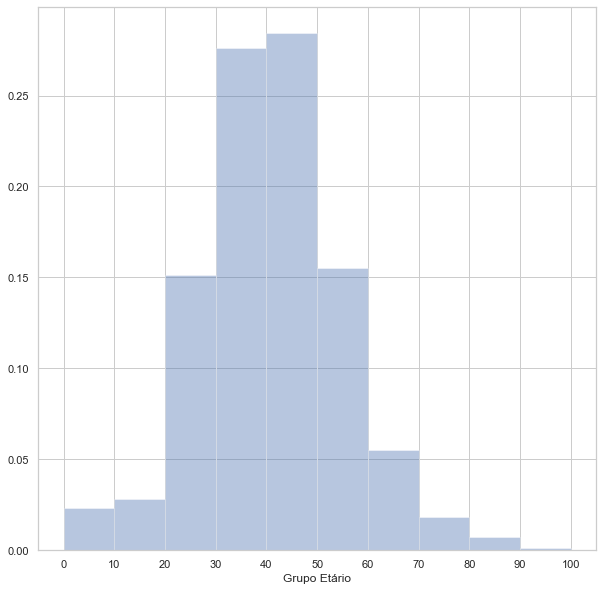

In [12]:
#Em seguida elaborar o histograma
sns.set(style="whitegrid")
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
k = sns.distplot(df['_grupo_et'], kde=False, ax=ax, norm_hist=True, bins = np.arange(11), axlabel='Grupo Etário')
k.set_xticks(np.arange(0, 11))
_ = k.set_xticklabels(np.arange(0, 101, 10))

#### 6. Elabore um gráfico que mostra o cumulativo de casos notificados ao longo do tempo;

Text(0.5, 0, 'Data de Notificação')

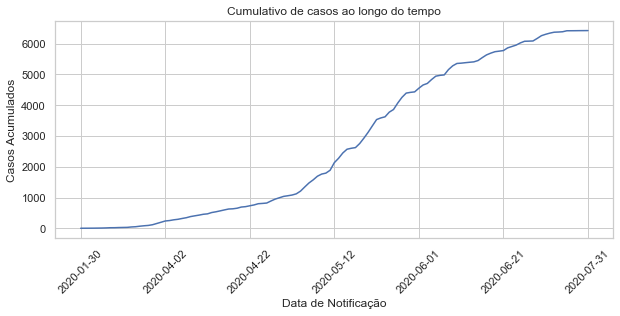

In [13]:
#primeiramente, calular os casos acumulados a cada dia do dataset
dt_notif_df = df['_dt_notificacao'].value_counts(sort=False).sort_index(ascending=True).reset_index()
dt_notif_df.columns = ['Data_notificação', 'Casos Acumulados']
dt_notif_df['Data_notificação'] = dt_notif_df['Data_notificação'].apply(lambda x: x.strftime('%Y-%m-%d'))
pre_df = {}
acum = dt_notif_df['Casos Acumulados'][0]
pred_df = {dt_notif_df['Data_notificação'][0]: acum}
for case in dt_notif_df[1:].iterrows():
    acum += case[1]['Casos Acumulados']
    pred_df[case[1]['Data_notificação']] = acum
#em seguida plottar o gráfico
pd.DataFrame(pred_df.values(), index = pred_df.keys()).plot(figsize=(10, 4), 
                                                            legend=False, 
                                                            title="Cumulativo de casos ao longo do tempo")
_ = plt.xticks(rotation=45)
plt.ylabel('Casos Acumulados')
plt.xlabel('Data de Notificação')

#### 7. Faça um gráfico do tipo scatterplot que denote a idade versus o número total de casos registrado para aquela idade. Aproveite o processamento efetuado para o cálculo da correlação. É possível observar alguma tendência?

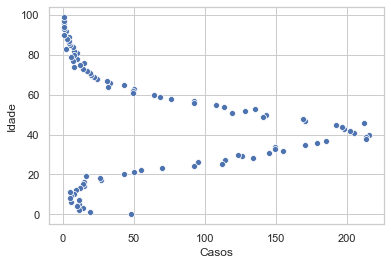

In [14]:
scat_idade = df['_idade'].value_counts().reset_index()
scat_idade.columns = ['Idade', 'Casos']
sns.scatterplot(x=scat_idade['Casos'], y=scat_idade['Idade'])

In [15]:
correlation = scat_idade.corr()['Casos'][0]
#negativa e fraca(próxima de 0)
#a correlação negativa indica que quanto maior o número de casos, menor a idade, porém não é uma correlação perfeita,
#mostrando um comportamento parabólico, ao invés de linear

In [16]:
import IPython
IPython.display.HTML(url = 'https://censo2010.ibge.gov.br/sinopse/webservice/frm_piramide.php?codigo=130260&corhomem=3d4590&cormulher=9cdbfc')

## Proposições

#### 1 - Uma tarefa de classificação mediante Aprendizado Supervisionado que poderia ser feita com esta base de dados. Qual seria o atributo-alvo? Quais métricas de desempenho poderiam ser aplicadas? Que tipo de validação seria apropriado?

In [17]:
#reanalisar o dataset de forma integral
df = pd.read_csv('Manaus.csv', sep = ';', encoding='latin-1')
#Foi feita uma conversão das colunas com datas de strings para o objetos timestamps.
df = df[df['_classificacao'] == 'Confirmado']
df.head()

C:\Users\luido\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (12,15,22,24,30,31,32,33,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,_idade,_faixa etária,_sexo,_bairro,_classificacao,_comorb_renal,_comorb_diabetes,_comorb_imuno,_comorb_cardio,_conclusao,...,_distrito,_bairro_mapa,_comorb_respiratoria,_comorb_cromossomica,_comorb_hepatica,_comorb_neurologica,_comorb_hemato,_comorb_obessidade,_origem,_evolução
0,37.0,30a - 39a,F,CONJ. CIDADAO 10,Confirmado,Não,Não,Não,Não,NaN,...,OESTE,TARUMÃ,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
2,51.0,50a - 59a,F,NaN,Confirmado,Não,Não,Não,Não,NaN,...,NaN,NaN,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
3,74.0,70a - 79a,M,NaN,Confirmado,Não,Não,Não,Não,NaN,...,NaN,NaN,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
4,51.0,50a - 59a,F,ALEIXO,Confirmado,Não,Não,Não,Não,NaN,...,SUL,ALEIXO,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
5,53.0,50a - 59a,M,PARQUE10,Confirmado,Não,Não,Não,Não,NaN,...,SUL,PARQUE 10 DE NOVEMBRO,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN


In [18]:
df_class = df[['_idade', '_sintoma_garganta',
       '_sintoma_dispneia', '_sintoma_febre', '_sintoma_tosse',
       '_sintoma_outros', '_evolução']].dropna()
df_class.head()

,_idade,_sintoma_garganta,_sintoma_dispneia,_sintoma_febre,_sintoma_tosse,_sintoma_outros,_evolução
80245,46.0,Sim,Não,Sim,Sim,Sim,Em tratamento domiciliar
80263,1.0,Não,Não,Não,Não,Sim,Em tratamento domiciliar
80271,10.0,Não,Não,Não,Não,Sim,Em tratamento domiciliar
80272,0.0,Não,Não,Não,Não,Sim,Em tratamento domiciliar
80273,0.0,Não,Não,Não,Não,Sim,Em tratamento domiciliar


#### 2 - Uma tarefa de regressão mediante Aprendizado Supervisionado que poderia ser feita com esta base de dados. Qual seria o atributo-alvo? Quais atributos preditores a equipe considera relevantes para o cenário?

#### 3 - Bônus: Qual tarefa de Aprendizado Não-Supervisionado poderia ser concebida neste contexto?

In [19]:
df_unsup = df[['_idade', '_comorb_renal', '_comorb_diabetes', '_comorb_imuno', '_comorb_cardio','_comorb_respiratoria', '_conclusao']].dropna()

In [20]:
X = df_unsup[['_idade', '_comorb_renal', '_comorb_diabetes', '_comorb_imuno', '_comorb_cardio','_comorb_respiratoria']]
Y = df_unsup[['_conclusao']]
X['_comorb_renal'] = pd.Series(np.where(X._comorb_renal.values == 'Sim', 1, 0),
          X.index)
X['_comorb_diabetes'] = pd.Series(np.where(X._comorb_diabetes.values == 'Sim', 1, 0),
          X.index)
X['_comorb_imuno'] = pd.Series(np.where(X._comorb_imuno.values == 'Sim', 1, 0),
          X.index)
X['_comorb_cardio'] = pd.Series(np.where(X._comorb_cardio.values == 'Sim', 1, 0),
          X.index)
X['_comorb_respiratoria'] = pd.Series(np.where(X._comorb_respiratoria.values == 'Sim', 1, 0),
          X.index)

C:\Users\luido\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\luido\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\luido\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum